In [1]:
import numpy as np
import sunpy 
import sunpy.map
import h5py
import matplotlib.pyplot as plt
from glob import glob
import os
import astropy.units as u
from astropy.visualization import ImageNormalize, AsinhStretch

In [2]:
slit_dirs = sorted(glob('../../sav/dynamic_fibrils/upflow/F*/',recursive=True))
slit_dirs

['../../sav/dynamic_fibrils/upflow/F1/',
 '../../sav/dynamic_fibrils/upflow/F2/',
 '../../sav/dynamic_fibrils/upflow/F3/',
 '../../sav/dynamic_fibrils/upflow/F4/',
 '../../sav/dynamic_fibrils/upflow/F5/',
 '../../sav/dynamic_fibrils/upflow/F6/',
 '../../sav/dynamic_fibrils/upflow/F7/',
 '../../sav/dynamic_fibrils/upflow/F8/',
 '../../sav/dynamic_fibrils/upflow/F9/']

In [3]:
slit_bottom_lefts = []
slit_top_rights = []
slit_pixels_idys = []
slit_pixels_idxs = []

for ii, slit_dir in enumerate(slit_dirs):
    with h5py.File(os.path.join(slit_dir,'slit_info.h5'), 'r') as h5_file:
        slit_bottom_lefts.append(h5_file['bottom_left'][:])
        slit_top_rights.append(h5_file['top_right'][:])
        slit_pixels_idys.append(h5_file['pixels_idy'][:])
        slit_pixels_idxs.append(h5_file['pixels_idx'][:])
    

In [4]:
eui_map_181 = sunpy.map.Map('../../src/coalign_map/20221024/hri_174_map_shifted_toaia.fits')
eui_map_181_boxcar = sunpy.map.Map('../../src/EUI/HRI/euv174/20221024/coalign_step_boxcar/eui_map_seq_coalign_boxcar_181.fits')
eui_map_181_boxcar = sunpy.map.Map(eui_map_181_boxcar.data, eui_map_181.meta)
eis_195_velmap_derot_repro_shifted_hrifov = sunpy.map.Map("../../src/EIS/DHB_007_v2/20221025T0023/sunpymaps/eis_195_velmap_derot_repro_hrifov.fits")
eis_hhflare_195_velmap_derot_repro_hrifov = sunpy.map.Map("../../src/coalign_map/20221024/eis_hhflare_195_velmap_derot_repro_hrifov.fits")

(-0.5, 2047.5, -0.5, 2047.5)

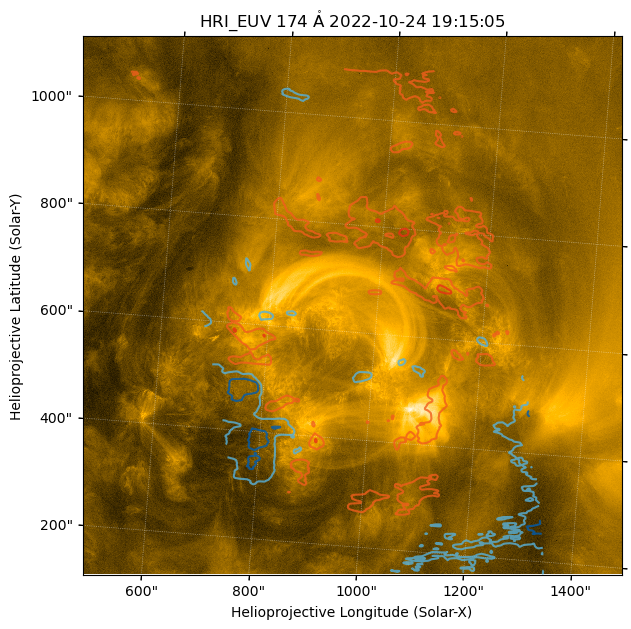

In [5]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111,projection=eui_map_181.wcs)
eui_map_181.plot(axes=ax)

bounds = ax.axis()
eis_195_velmap_derot_repro_shifted_hrifov.draw_contours(levels=[-10,-5,5,10],colors=["#005CAF","#58B2DC","#F05E1C","#E83015"],alpha=0.8,
                        axes=ax)
ax.axis(bounds)


In [6]:
eui_map_upflow_east_1 = eui_map_181_boxcar.submap(slit_bottom_lefts[0]*u.pix, top_right=slit_top_rights[0]*u.pix)

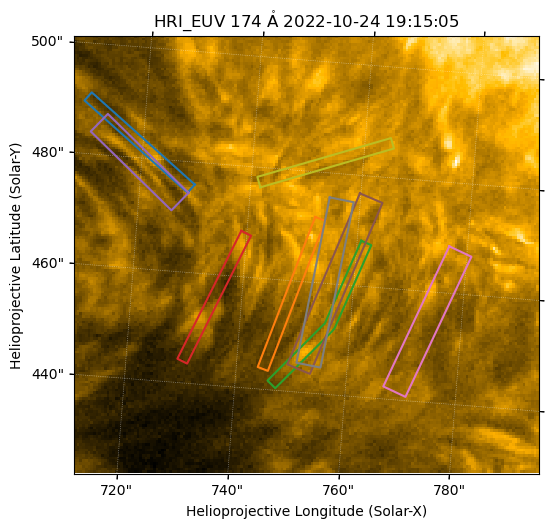

In [7]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection=eui_map_upflow_east_1)
eui_map_upflow_east_1.plot(axes=ax,norm=ImageNormalize(stretch=AsinhStretch(0.3)))
for pixels_idy, pixels_idx in zip(slit_pixels_idys, slit_pixels_idxs):
    boundary_x = np.concatenate((pixels_idx[:,0],pixels_idx[-1,1:],
                                 pixels_idx[-1::-1,-1],pixels_idx[0,-1::-1]))
    boundary_y = np.concatenate((pixels_idy[:,0],pixels_idy[-1,1:],
                                    pixels_idy[-1::-1,-1],pixels_idy[0,-1::-1]))

    ax.plot_coord(boundary_x, boundary_y)